In [1160]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn

B_WORD = 4
W_WORD = 4
C_BL = 300 * 10**(-15)
R_BL = 60 * 10**(3)

p = np.random.rand(128)
w = np.random.rand(int(128/(W_WORD)),128)
final_fp = np.dot(w[31][:],p)/128
# q_v = np.linspace(0,1,(2**6))
# print(q_v)
# print(final_fp)

# for j in range (0,16):
#     diff = 0
#     prev_diff = 0
#     diff = final_fp - q_v[j]
#     prev_diff = final_fp - q_v[j-1]
#     if((prev_diff >= 0) and (diff <= 0 )):
#         if(abs(prev_diff)>abs(diff)):
#             final_fp = j
#         else:
#             final_fp = j-1
# print(final_fp)
# w = np.random.uniform(-1,1,128)
#p_q = torch.quantize_per_tensor(p,0.1,0,torch.qint8)
q_v = np.linspace(0,1.0,(2**4))
# print(p)
# print(p_q)
# np.array[p_q]
for i in range (0,128):
    diff = 0
    prev_diff = 0
    for j in range (0,16):
        diff = p[i] - q_v[j]
        prev_diff = p[i] - q_v[j-1]
        if((prev_diff >= 0) and (diff <= 0 )):
            if(abs(prev_diff)>abs(diff)):
                p[i] = j
            else:
                p[i] = j-1

q_v = np.linspace(0,1.0,(2**4))
for x in range (0,32):            
    for i in range (0,128):
        diff = 0
        prev_diff = 0
        for j in range (0,16):
            diff = w[x][i] - q_v[j]
            prev_diff = w[x][i] - q_v[j-1]
            if((prev_diff >= 0) and (diff <= 0 )):
                if(abs(prev_diff)>abs(diff)):
                    w[x][i] = j
                else:
                    w[x][i] = j-1

# print(q_v)
# print(w[1][:])
# print(p)    
w_array = np.zeros([128,128])
w [0][:] = 15
w [1][:] = 13

w_int = w.copy()


# for x in range (0,128/(W_WORD))
#     for i in range (0,128):
#         for j in range(0,W_WORD):
#             w_array[i][j] = w_int[0][i] // (np.power(2,(W_WORD-1)-j))
#             if(w_array[i][j] == 1):
#                 w_int[0][i] = w_int[0][i] - (np.power(2,(W_WORD-1)-j))

for x in range (0,int(128/(W_WORD))):
    for y in range (0,W_WORD):
        for z in range (0,128):
            w_array [(x*4)+y][z] = w_int[x][z] // (np.power(2,(W_WORD-1)-y))
            if (w_array [(x*4)+y][z] == 1) :
                w_int[x][z] = w_int[x][z] - (np.power(2,(W_WORD-1)-y))
        
    
print(w[0][:])
print(w_array[0:4][:])
print(p)

[15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15. 15.
 15. 15.]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 

In [1161]:
class DIMA:
    def __init__(self, n_row, n_col, weight):
        self.row = n_row
        self.col = n_col
        self.size = self.col * self.col
        self.memarray = np.zeros([n_row,n_col])
        self.memarray = weight
        
        self.resistance_var = np.random.normal(0,1800,(128,128))
                
    def full_dp(self,row_index,P):
        v_bl, v_blb, data_val = self.funct_read(row_index)
        blp_out = self.blp(P,v_bl,v_blb)
        cblp_out = self.cblp(blp_out)
        ret = self.ADC(cblp_out)
        return ret
        
    def funct_read(self, row_index):
        data_val = np.zeros(self.col)
        data_val_b = np.zeros(self.col)
        v_bl = np.ones(self.col)
        v_blb= np.ones(self.col)
        for i in range (0,self.col):
            for j in range(0,W_WORD):
                data_val[i] = data_val[i] + (2**(W_WORD-1-j)) * self.memarray[(W_WORD*row_index)+j][i] 
                
        data_val_b[i] = ((2**(W_WORD))-1) - data_val[i]
        
        for i in range(0,4):
            v_bl = v_bl - 1/(C_BL * (R_BL+self.resistance_var[row_index*W_WORD+i][:])) * (250*10**(-12))* 2**(W_WORD-1-i)*((self.memarray[(W_WORD*row_index)+i]+1)%2) 
            v_blb = v_blb - 1/(C_BL * (R_BL+self.resistance_var[row_index*W_WORD+i][:])) * (250*10**(-12))* 2**(W_WORD-1-i)* self.memarray[(W_WORD*row_index)+i]
        return v_bl, v_blb, data_val
    
    def blp(self, P_val, v_bl, v_blb):
        blp_out = np.zeros(self.col)
        for i in range(0,self.col):
            blp_out[i] = 1 - (0.5**(B_WORD)) * (P_val[i]) * (1-v_blb[i])
        return blp_out
        
    def cblp(self, blp_out):
        cblp_out = np.average(blp_out)
        return cblp_out
    
    def ADC(self, cblp_out):
#         cblp_out_1 = 10*(1 - cblp_out) 
        q_v = np.linspace(0.804588,1.000001,2**6)
        diff = 0
        prev_diff = 0
        for j in range (0,64):
            diff = cblp_out - q_v[j]
            prev_diff = cblp_out - q_v[j-1]
            if((prev_diff >= 0) and (diff < 0 )):
                if(abs(prev_diff)>abs(diff)):
                    output = 63 - j
                else:
                    output = 64 - j
        return output
    
    def write(self, row_index, array):
        self.mem_array[row_index*4:row_index*4+4][:] = mem_array
             
            

In [1162]:
dima = DIMA(128,128,w_array)

[12. 13.  3. 10.  7.  7.  0. 14.  8. 11.  4.  4. 12.  3.  4. 12. 11. 12.
 12.  7.  5. 14.  6.  9.  5. 11.  5. 15.  2. 11.  2.  8. 15.  3. 15. 15.
  6. 13.  7. 11. 14.  6.  8.  6.  7. 15. 15.  4. 12.  4.  2. 10.  6.  5.
 12. 11. 15. 14.  5.  7.  9.  8.  6.  8.  9. 14. 13.  2. 15.  2.  2. 10.
  0.  7.  3.  8.  3. 10. 15.  2.  7.  6.  9. 10.  4. 14.  4.  4.  4.  5.
 13.  2.  3.  3. 11.  2. 12. 14.  3. 10.  8.  2.  4.  3. 12. 13.  8.  5.
  5.  3. 13.  4.  5.  6.  8.  9. 14. 10.  8.  9.  2. 12. 14.  3.  4.  2.
  7.  3.]
19 19 0.8975917516153111 0.24312549565515174


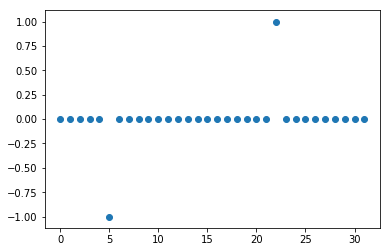

In [1163]:
# p = np.random.rand(128)
# q_v = np.linspace(0,1.0,(2**4))

# for i in range (0,128):
#     diff = 0
#     prev_diff = 0
#     for j in range (0,16):
#         diff = p[i] - q_v[j]
#         prev_diff = p[i] - q_v[j-1]
#         if((prev_diff >= 0) and (diff <= 0 )):
#             if(abs(prev_diff)>abs(diff)):
#                 p[i] = j
#             else:
#                 p[i] = j-1

print(p)
v_bl, v_blb, data_val = dima.funct_read(0)
blp_out = dima.blp(p,v_bl,v_blb)
cblp_out = dima.cblp(blp_out)
error = []
q_v = np.linspace(0,225,2**6)
for x in range (0,32):
    final = dima.full_dp(x,p)
    final_digital_i = np.dot(w[x][:],p)/128

    for j in range (0,64):
        diff = final_digital_i - q_v[j]
        prev_diff = final_digital_i - q_v[j-1]
        if((prev_diff >= 0) and (diff <= 0 )):
            if(abs(prev_diff)>abs(diff)):
                final_digital = j
            else:
                final_digital= j-1
    error.append(final_digital - final)

error = np.array(error)
plt.scatter(np.arange(0,32),error)
print(final_digital,final,cblp_out,final_fp)


In [1003]:
# k = 115*10**(-6)
# lambda_ = 0.06
# vd_sat = 0.63
# v_t = np.zeros(1000)
# v_t = 0.43 + np.random.normal(0,0.043,1000)
# print(np.var(v_t))
# w_l = 2
# I = np.zeros(1000)
# I = k*w_l*((2.5-v_t)*0.63-(0.63**(2))/2)*(1+lambda_*2.5)

# r_eq = np.zeros 
# r_eq = (3/4) * (2.5/I) * (1-(5/6)*lambda_*2.5)  

# print(r_eq)
# print(np.mean(r_eq))
# # print(np.var(r_eq))
# test = np.zeros(1000)
# print(np.max(r_eq))
# test = 5600 + np.random.normal(0,160,1000)
# #print(test)
# print(np.max(test))

0.0019951491395043103
[5418.15591664 5572.44968195 5559.94306108 5541.03211842 5441.72527299
 5501.59332284 5602.10688851 5577.00337277 5775.50325818 5292.7388805
 5459.67631353 5807.41934124 5412.97049033 5522.71877302 5527.02546441
 5612.37845811 5248.12140519 5694.92038524 5819.76696045 6086.54395834
 5679.11028464 5688.54998141 5760.6930544  5682.51763216 5481.3660643
 5483.88306032 5576.87611873 5546.21932253 5597.56906923 5664.74575188
 5482.44205453 5648.78635875 5773.52364288 5525.46322447 5527.06435081
 5730.64523059 5649.33243809 5666.65873637 5537.14262731 5383.19113328
 5462.24179291 5566.39339577 5690.33823855 5443.21746544 5629.02411751
 5866.36551844 5611.18931351 5989.03210864 5667.44189568 5806.18612924
 5300.22462422 5565.38454358 5676.93816297 5488.86962841 5650.88596965
 5582.6483609  5858.4510901  5694.29435367 5375.9616172  5732.83723035
 5672.34168161 5655.2313678  5539.1850207  5550.59692899 5600.18348683
 5647.00730703 5629.57845133 5644.85308443 5528.15420835 

 5513.30318634 5534.17877651 5595.48812555 5542.46099325 5756.38593582]
5615.33674774377
6100.799981915026
6064.04203478484
